# ML - Supervised - Classification - RandomForest

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split as TTS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RF

## Labelised Data

### DataSet de Kaggle : Mushrooms.csv
#### Nous allons chercher à déterminer si les champignons sont comestibles ou non 

In [3]:
#Chargement
#https://www.kaggle.com/uciml/mushroom-classification
filename = "mushrooms.csv"
path = "data/{}".format(filename)
df = pd.read_csv(path)
#df

### Cleaning

In [4]:
df.isnull().values.any()

False

### Isolation

In [6]:
#Isolation
#target_feature_name = 'target_feature'
target_feature_name = 'class'
Y = df[target_feature_name]
X = df.drop(columns=target_feature_name)
#Affichage d'un champignon
#print("mushroom 0 : ", X.to_numpy()[0][i in range(0, X.shape[1])][0])
#Transformation from char to int
X = X.apply(lambda d : d.apply(lambda d : ord(d)-ord('a')+1))
#Affichage d'un champignon
#print("\n\tto\n\nmushroom 0 : ", X.to_numpy()[0][i in range(0, X.shape[1])][0])

### Labels

In [8]:
#Classes/Labels
classes = Y.astype('category').cat.categories.tolist()

## Model Building

In [9]:
#TTS
X_tr, X_te, Y_tr, Y_te = TTS(X, Y, stratify=Y, random_state=314)

In [10]:
#Pipeline
pipeline_details = [('PCA', PCA(random_state=20)),
                    ('RF', RF())]
pipeline = Pipeline(steps=pipeline_details)

In [11]:
#GridSearchCV

hyperparameters = {}
hyperparameters['PCA__n_components'] = [i for i in range(1, 5)]
hyperparameters['RF__n_estimators']  = [i for i in range(80, 120 +1, 10)]

In [12]:
hyperparameters

{'PCA__n_components': [1, 2, 3, 4],
 'RF__n_estimators': [80, 90, 100, 110, 120]}

In [13]:
hyperparameter_search = GridSearchCV(pipeline,
                                     hyperparameters,
                                     scoring='accuracy', 
                                     cv=3)

In [14]:
hyperparameter_search.fit(X_tr, Y_tr)

print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

Meilleur score : 0.98129
Meilleur paramètres : {'PCA__n_components': 4, 'RF__n_estimators': 100}


In [15]:
#PCA
N=hyperparameter_search.best_params_['PCA__n_components']
pca = PCA(n_components=N, random_state=20)
pca.fit(X_tr);

In [16]:
#Transform
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

In [17]:
#RF
N=hyperparameter_search.best_params_['RF__n_estimators']
rf = RF(n_estimators=N)
rf.fit(X_tr_PCA, Y_tr);

In [18]:
#Accuracy du training
train_preds = rf.predict(X_tr_PCA)
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(train_preds, Y_tr)))

Accuracy : 1.0


## Unlabelised Data

In [19]:
#Chargement
#df = pd.read_csv("data/filename.csv")
unlabeled_df = pd.DataFrame(X_te_PCA)

### Prediction

In [20]:
#RF
preds = rf.predict(unlabeled_df)
proba = rf.predict_proba(unlabeled_df)

## Result

In [21]:
unlabeled_df = pd.DataFrame(X_te)
unlabeled_df['Predictions'] = preds
for i in range(0, len(proba[0])):
    unlabeled_df[classes[i]] = proba[:, i]

#for k in range(0, len(proba)):
#    print('iris[', k, ']')
#    for i in range(0, len(proba[0])):
#        print('{} {}= {}'.format(classes[i], (10-len(classes[i]))*' ', proba[k][i]))

unlabeled_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Predictions,e,p
4577,6,6,7,6,6,6,3,2,16,5,...,16,23,15,12,8,22,7,p,0.00,1.00
30,2,19,25,20,12,6,3,2,7,5,...,16,23,15,16,14,14,13,e,1.00,0.00
4551,6,6,25,6,6,6,3,2,16,5,...,16,23,15,12,8,22,16,p,0.00,1.00
3155,6,6,7,20,14,6,3,2,21,20,...,16,23,15,16,11,25,4,e,0.99,0.01
2331,24,25,14,20,14,6,3,2,23,20,...,16,23,15,16,11,22,4,e,0.99,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,6,6,7,6,14,6,23,2,16,20,...,16,23,15,5,14,19,7,e,1.00,0.00
1810,6,19,14,20,16,6,3,14,14,5,...,16,23,15,16,14,19,7,p,0.08,0.92
4117,24,6,25,6,6,6,3,2,7,5,...,16,23,15,12,8,25,16,p,0.00,1.00
109,24,19,25,20,1,6,3,2,11,5,...,16,23,15,16,11,14,13,e,0.99,0.01


## Matrice de confusion

In [22]:
from sklearn.metrics import confusion_matrix
def show_cm(cm, labels):
    """show confusion matrix
    """
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

Matrice de confusion de l'entrainement :
Accuracy : 1.0


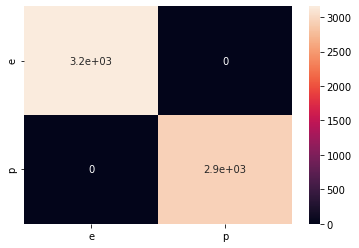

In [23]:
print("Matrice de confusion de l'entrainement :")
print('Accuracy : {}'.format(accuracy(train_preds, Y_tr)))
cm_train = confusion_matrix(train_preds, Y_tr, labels=classes)
show_cm(cm_train, classes)
#Accuracy du training
accuracy = lambda p, y : (p==y).sum()/len(y)

Matrice de confusion du test :
Accuracy : 0.9842442146725751


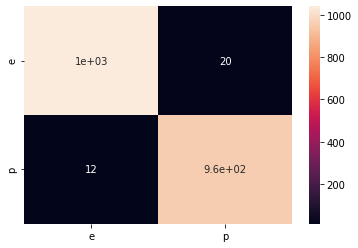

In [24]:
print("Matrice de confusion du test :")
print('Accuracy : {}'.format(accuracy(preds, Y_te)))
cm_test = confusion_matrix(preds, Y_te, labels=classes)
show_cm(cm_test, classes)
#Accuracy du training
accuracy = lambda p, y : (p==y).sum()/len(y)